In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import os
from PIL import Image
from search.search import get_search_results
import torch
import torchvision.transforms as transforms

from models.train import generate_positive_pairs, generate_negative_pairs
from data.dataset import GalaxyCBRDataSet

In [2]:
to_pil = transforms.ToPILImage()

data_dir = './data/galaxy_dataset/'
data_transforms = transforms.ToTensor()
galaxy_dataset = GalaxyCBRDataSet(data_dir, data_transforms, force_download=False, h5_file="")

In [16]:
def plot_side_by_side(image_pair, pair_type=''):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(to_pil(image_pair[0]))
    axes[0].set_title('Original Image')
    axes[1].imshow(to_pil(image_pair[1]))
    axes[1].set_title(pair_type + ' Transformation')

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    
    plt.show()


def plot_images_with_grid(query_image, grid_images, paths):
    fig, axes = plt.subplots(2, len(grid_images), figsize=(10, 5))

    for i in range(len(grid_images)):
        if (i == 0):
            axes[0][i].imshow(query_image)
            axes[0][i].set_title('Query Image')
        axes[0][i].set_xticks([])
        axes[0][i].set_yticks([])
        axes[0][i].set_xticklabels([])
        axes[0][i].set_yticklabels([])
        axes[0][i].spines['top'].set_visible(False)
        axes[0][i].spines['right'].set_visible(False)
        axes[0][i].spines['bottom'].set_visible(False)
        axes[0][i].spines['left'].set_visible(False)
    
    for i in range(len(grid_images)):
        axes[1][i].imshow(grid_images[i])
        axes[1][i].set_title(paths[i])
        axes[1][i].set_xticks([])
        axes[1][i].set_yticks([])
        axes[1][i].set_xticklabels([])
        axes[1][i].set_yticklabels([])
    
    plt.show()

In [4]:
query_img, idx = galaxy_dataset[810]

In [5]:
query_tensor = query_img.unsqueeze(0)
positive_pair = generate_positive_pairs(query_tensor, [0], 2, True)[0]
negative_pair = generate_negative_pairs(query_tensor, [idx], [0], 2, galaxy_dataset, True)[0]

Compose(
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
    AddGaussianNoise(mean=0.0, std=0.005829427346715312)
)
Compose(
    RandomRotation(degrees=[-180.0, 180.0], interpolation=nearest, expand=False, fill=0)
    RandomPerspective(p=1.0)
)


### Positive Transforms

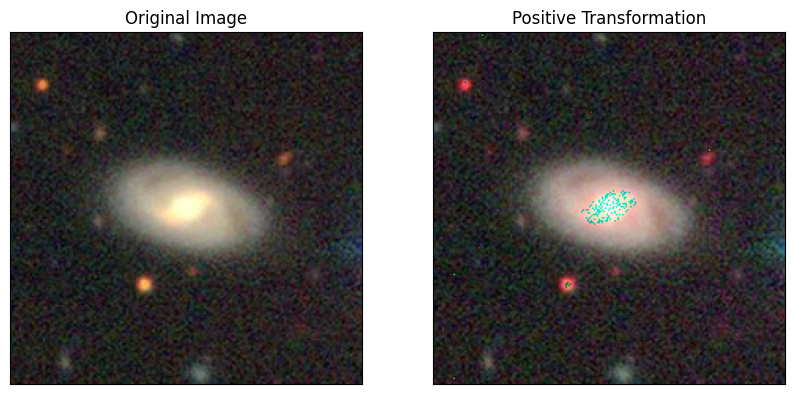

In [6]:
plot_side_by_side(positive_pair, pair_type='Positive')

### Negative Transformation

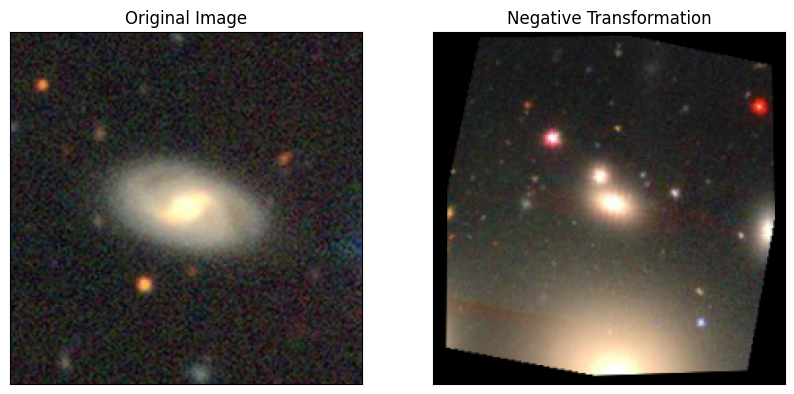

In [7]:
plot_side_by_side(negative_pair, pair_type='Negative')

### Model Performance Visualization

In [8]:
# search was conducted with the query image below:
# query_img = './data/galaxy_dataset/3/57.jpg'

In [9]:
res_paths, res_images = get_search_results('./search/results.txt')

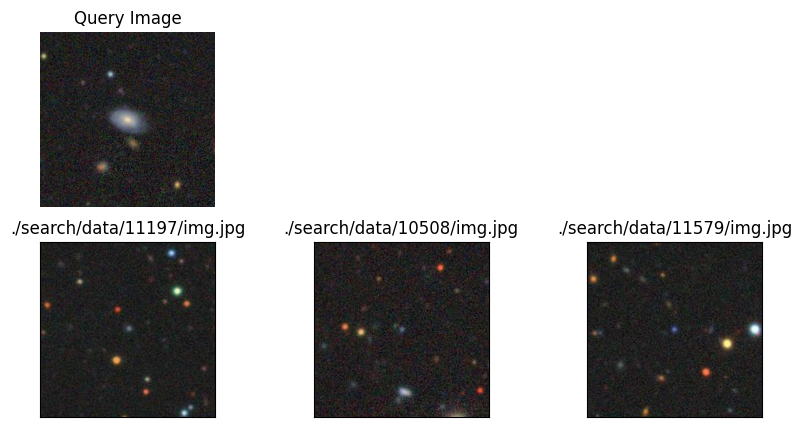

In [19]:
plot_images_with_grid(res_images[0], res_images[1:], res_paths[1:])